# General visualization of 100,000 records randomly selected from full dataset

In [1]:
from arcgis.gis import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
philly = pd.read_csv(r'D:\GIS_Data\Analytics\PhillyCrime\crime_rnd_100k.csv')

In [6]:
philly.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,year,month,day_of_month,day_of_week
0,1077918,2,P,2006-10-05 12:26:00,2006-10-05,12:26:00,12,200602066440,5400 BLOCK HOWLAND ST,300.0,Robbery Firearm,2.0,2006-10,-75.104097,40.033851,2006,10,5,Thursday
1,715433,15,3,2012-07-19 12:45:00,2012-07-19,12:45:00,12,201215069201,7300 BLOCK STATE RD,700.0,Recovered Stolen Motor Vehicle,11.0,2012-07,-75.031518,40.025703,2012,7,19,Thursday
2,935012,15,1,2013-03-29 13:26:00,2013-03-29,13:26:00,13,201315028674,1600 BLOCK BRIDGE ST,2600.0,All Other Offenses,11.0,2013-03,-75.075134,40.021602,2013,3,29,Friday
3,1798266,35,B,2008-06-04 09:12:00,2008-06-04,09:12:00,9,200835051111,100 BLOCK ROSEMAR ST,600.0,Theft from Vehicle,20.0,2008-06,-75.121373,40.043605,2008,6,4,Wednesday
4,2092116,2,1,2016-05-03 19:15:00,2016-05-03,19:15:00,19,201602026108,900 BLOCK ANCHOR ST,1400.0,Vandalism/Criminal Mischief,2.0,2016-05,-75.087890,40.033146,2016,5,3,Tuesday


In [7]:
philly.shape

(100000, 19)

## Which crime is most likely to occur?

In [8]:
philly.Text_General_Code.value_counts()

All Other Offenses                         19507
Other Assaults                             12341
Thefts                                     11725
Vandalism/Criminal Mischief                 8771
Theft from Vehicle                          7566
Narcotic / Drug Law Violations              6154
Fraud                                       5113
Burglary Residential                        4294
Recovered Stolen Motor Vehicle              4232
Aggravated Assault No Firearm               3045
DRIVING UNDER THE INFLUENCE                 2418
Robbery No Firearm                          2291
Motor Vehicle Theft                         2117
Robbery Firearm                             1835
Disorderly Conduct                          1753
Aggravated Assault Firearm                  1247
Burglary Non-Residential                    1076
Weapon Violations                            813
Other Sex Offenses (Not Commercialized)      745
Prostitution and Commercialized Vice         604
Rape                

In [10]:
print("number of classes: ", str(len(philly.Text_General_Code.value_counts())))

number of classes:  32


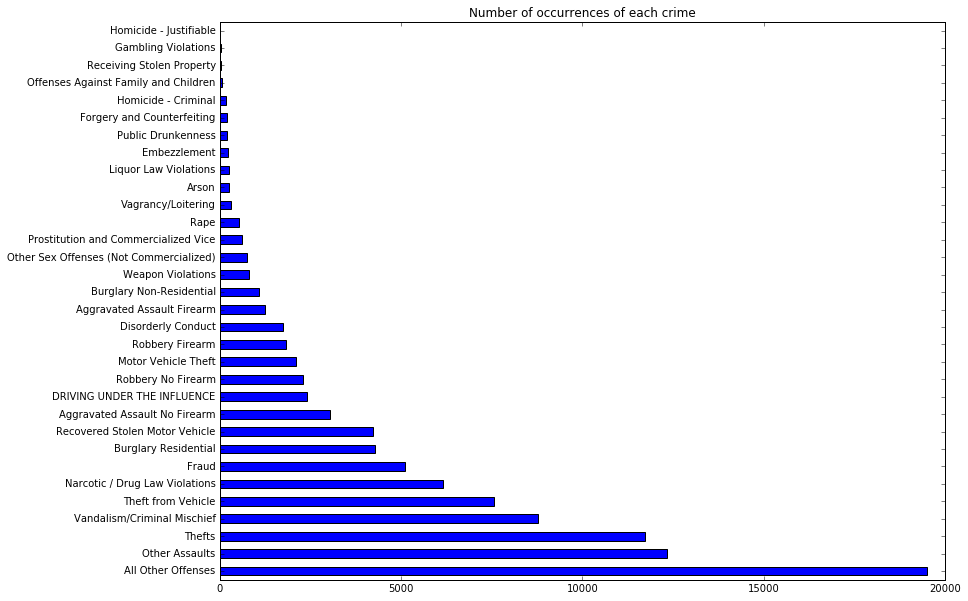

In [46]:
philly.Text_General_Code.value_counts().plot(kind='barh', figsize=(13,10), 
                                             title="Number of occurrences of each crime")

From the chart above, uncategorized crimes are the max. Following this is **thefts**. There are a lot of categoris that can potentially be grouped into smaller classes as well.

## What is the trend of the crimes, did they increase or decrease?

In [47]:
philly.year.value_counts(sort=False)

2006    10727
2007    10094
2008    10198
2009     9218
2010     8963
2011     8771
2012     8768
2013     8281
2014     8355
2015     8303
2016     7608
2017      714
Name: year, dtype: int64

Leave out the 2017 year as its incomplete

In [53]:
philly = philly[philly['year']!=2017]
philly.shape

(99286, 19)

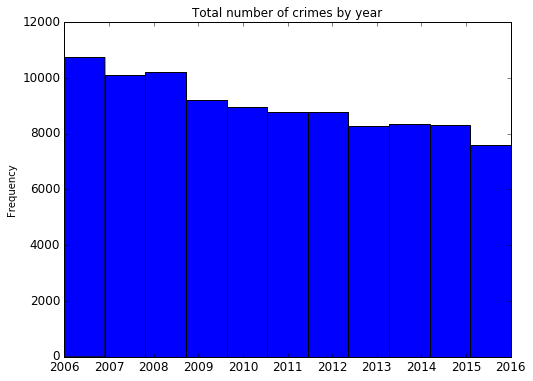

In [55]:
philly.year.plot.hist(bins=11, xticks=np.arange(2006,2017), fontsize=12,
                     title='Total number of crimes by year', figsize=(8,6))

So the total number of crimes did decrease oer the 12 years. Omit the 2017

### Specifically for theft, what is the trend?

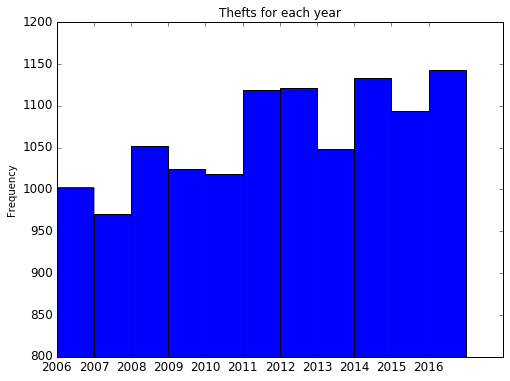

In [3]:
thefts = philly[philly['Text_General_Code']=='Thefts']
thefts.year.plot.hist(bins=11, xticks=np.arange(2006,2017), fontsize=12,
                     title='Thefts for each year', figsize=(8,6), ylim=(800,1200))

An interesting phenomena is going on. The number of thefts did not steadily decline. Instead it has followed a curve with some sort of 3 year seasonal trend

## Find which hour does each crime happen
Correlate Theft with hour

In [20]:
thefts = philly[philly['Text_General_Code']=='Thefts']
xticks = np.arange(0,24) #for the x axis

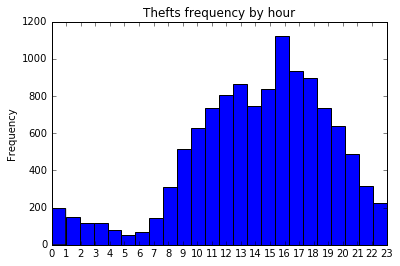

In [21]:
theft_plot= thefts.Hour.plot.hist(bins=24,xticks=xticks, 
                                  xlim=(0,23), title="Thefts frequency by hour")

Summarizing the full dataset over all the years, we see **evening 4 PM** is when thefts have peaked. Crime hour follows more or less a normal distribution.

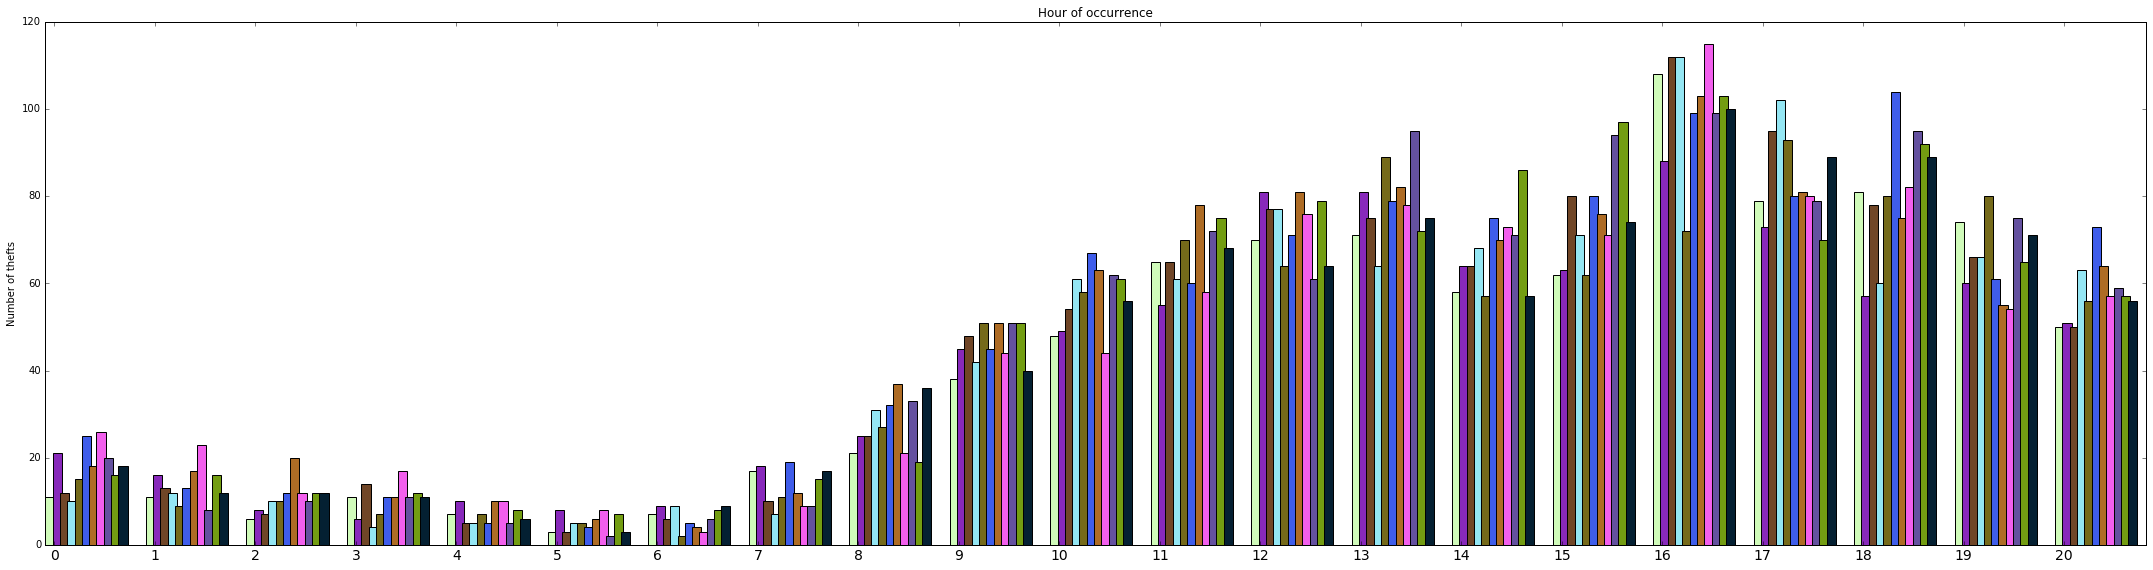

In [81]:
color = np.random.rand(thefts.year.value_counts(sort = False).shape[0], 3)
c = 0
plt.figure(figsize = (30, 8)) #making the plot bigger
for y in range(2006, 2017): 
    current_year = thefts[thefts['year']==y]
    year_vcount = np.array(current_year.Hour.value_counts(sort=False))
    N = year_vcount.shape[0]
    ind = np.arange(N)*1.1    
    width = 0.1
    p1 = plt.bar(ind + width*c*0.8, year_vcount, width, color= color[c])
    plt.ylabel('Number of thefts')
    plt.title('Hour of occurrence')
    plt.xticks(ind+width, xticks, fontsize=14)
    plt.axis([0, 23, 0.0, 120])
    c += 1
plt.tight_layout()

# Do we see a pattern where thefts are concentrated?

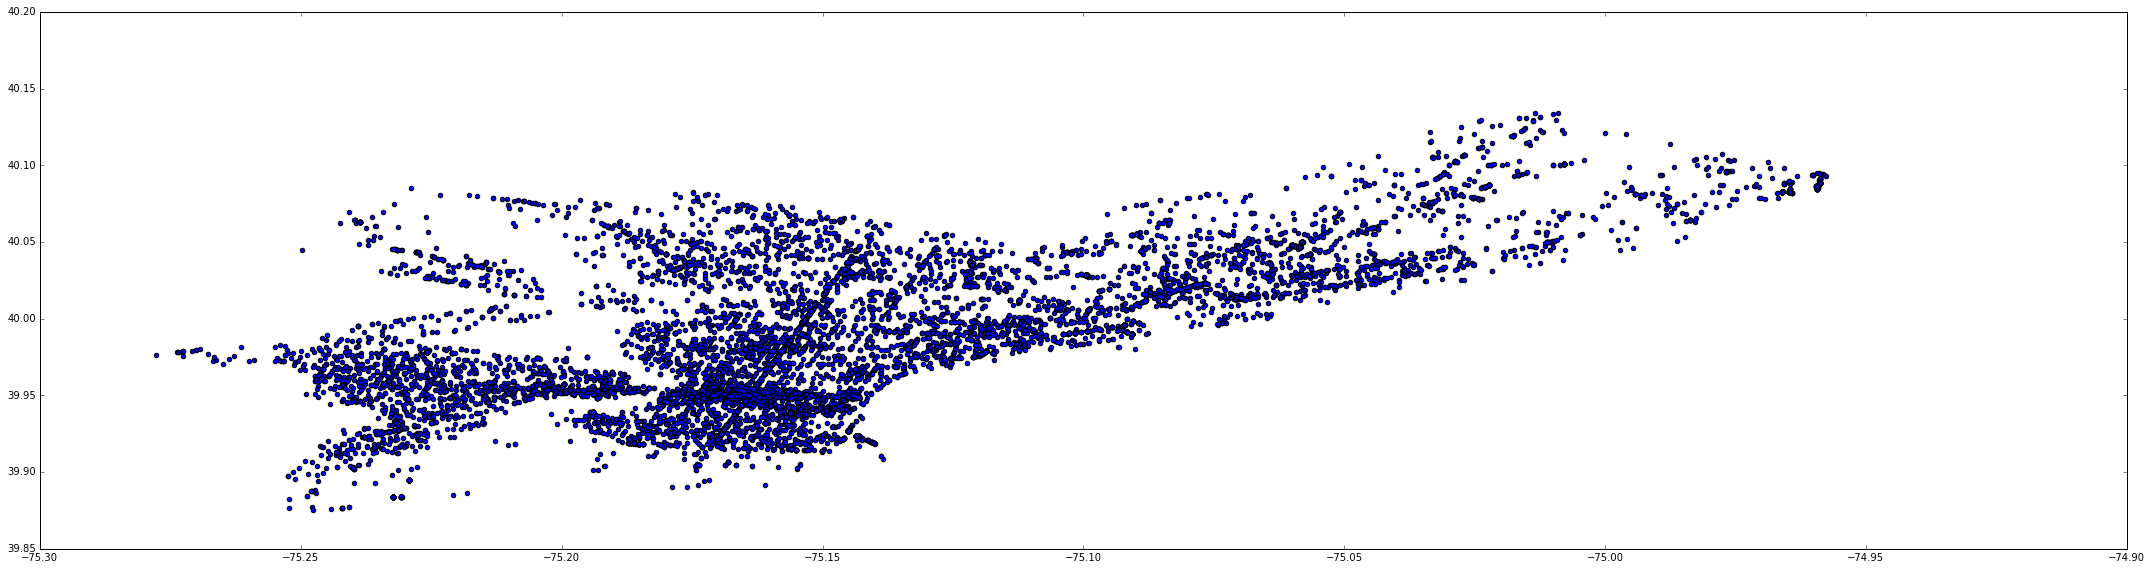

In [82]:
# Scatter plot of longitude and latitude
plt.scatter(thefts.Lon, thefts.Lat)
plt.tight_layout()
plt.figure(figsize=(8,8))

## Predicting crime type from 